In [1]:
import json
import csv
from collections import defaultdict

# Step 1: Read the JSON file
file_path = '/data1/dxw_data/llm/redbook_final/script_next/combined_seg_img_pure_094_cluster_imagebind3/labels.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Step 2: Initialize a dictionary to hold counts for each month and category
monthly_category_count = defaultdict(lambda: defaultdict(int))

# Step 3: Process each entry in the JSON data
for image_name, category in data.items():
    # Extract month from the image name
    month = image_name.split('_')[0].split('-')[0]
    
    # Convert to integer for easier handling later
    month = int(month)
    
    # Count the category for the given month
    monthly_category_count[month][category] += 1

# Step 4: Prepare the data for CSV output
output_data = []
for month, category_count in monthly_category_count.items():
    total_images = sum(category_count.values())
    for category, count in category_count.items():
        proportion = count / total_images
        output_data.append({
            'month': month,
            'nums_category_img': category,
            'count': count,
            'total': total_images,
            'proportion': proportion
        })

# Step 5: Write the data to CSV
output_file = '/data1/dxw_data/llm/redbook_final/script_next/combined_seg_img_pure_094_cluster_imagebind3/output.csv'
with open(output_file, 'w', newline='') as csvfile:
    fieldnames = ['month', 'nums_category_img', 'count', 'total', 'proportion']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in output_data:
        writer.writerow(row)

print(f"Data has been successfully written to {output_file}")


Data has been successfully written to /data1/dxw_data/llm/redbook_final/script_next/combined_seg_img_pure_094_cluster_imagebind3/output.csv


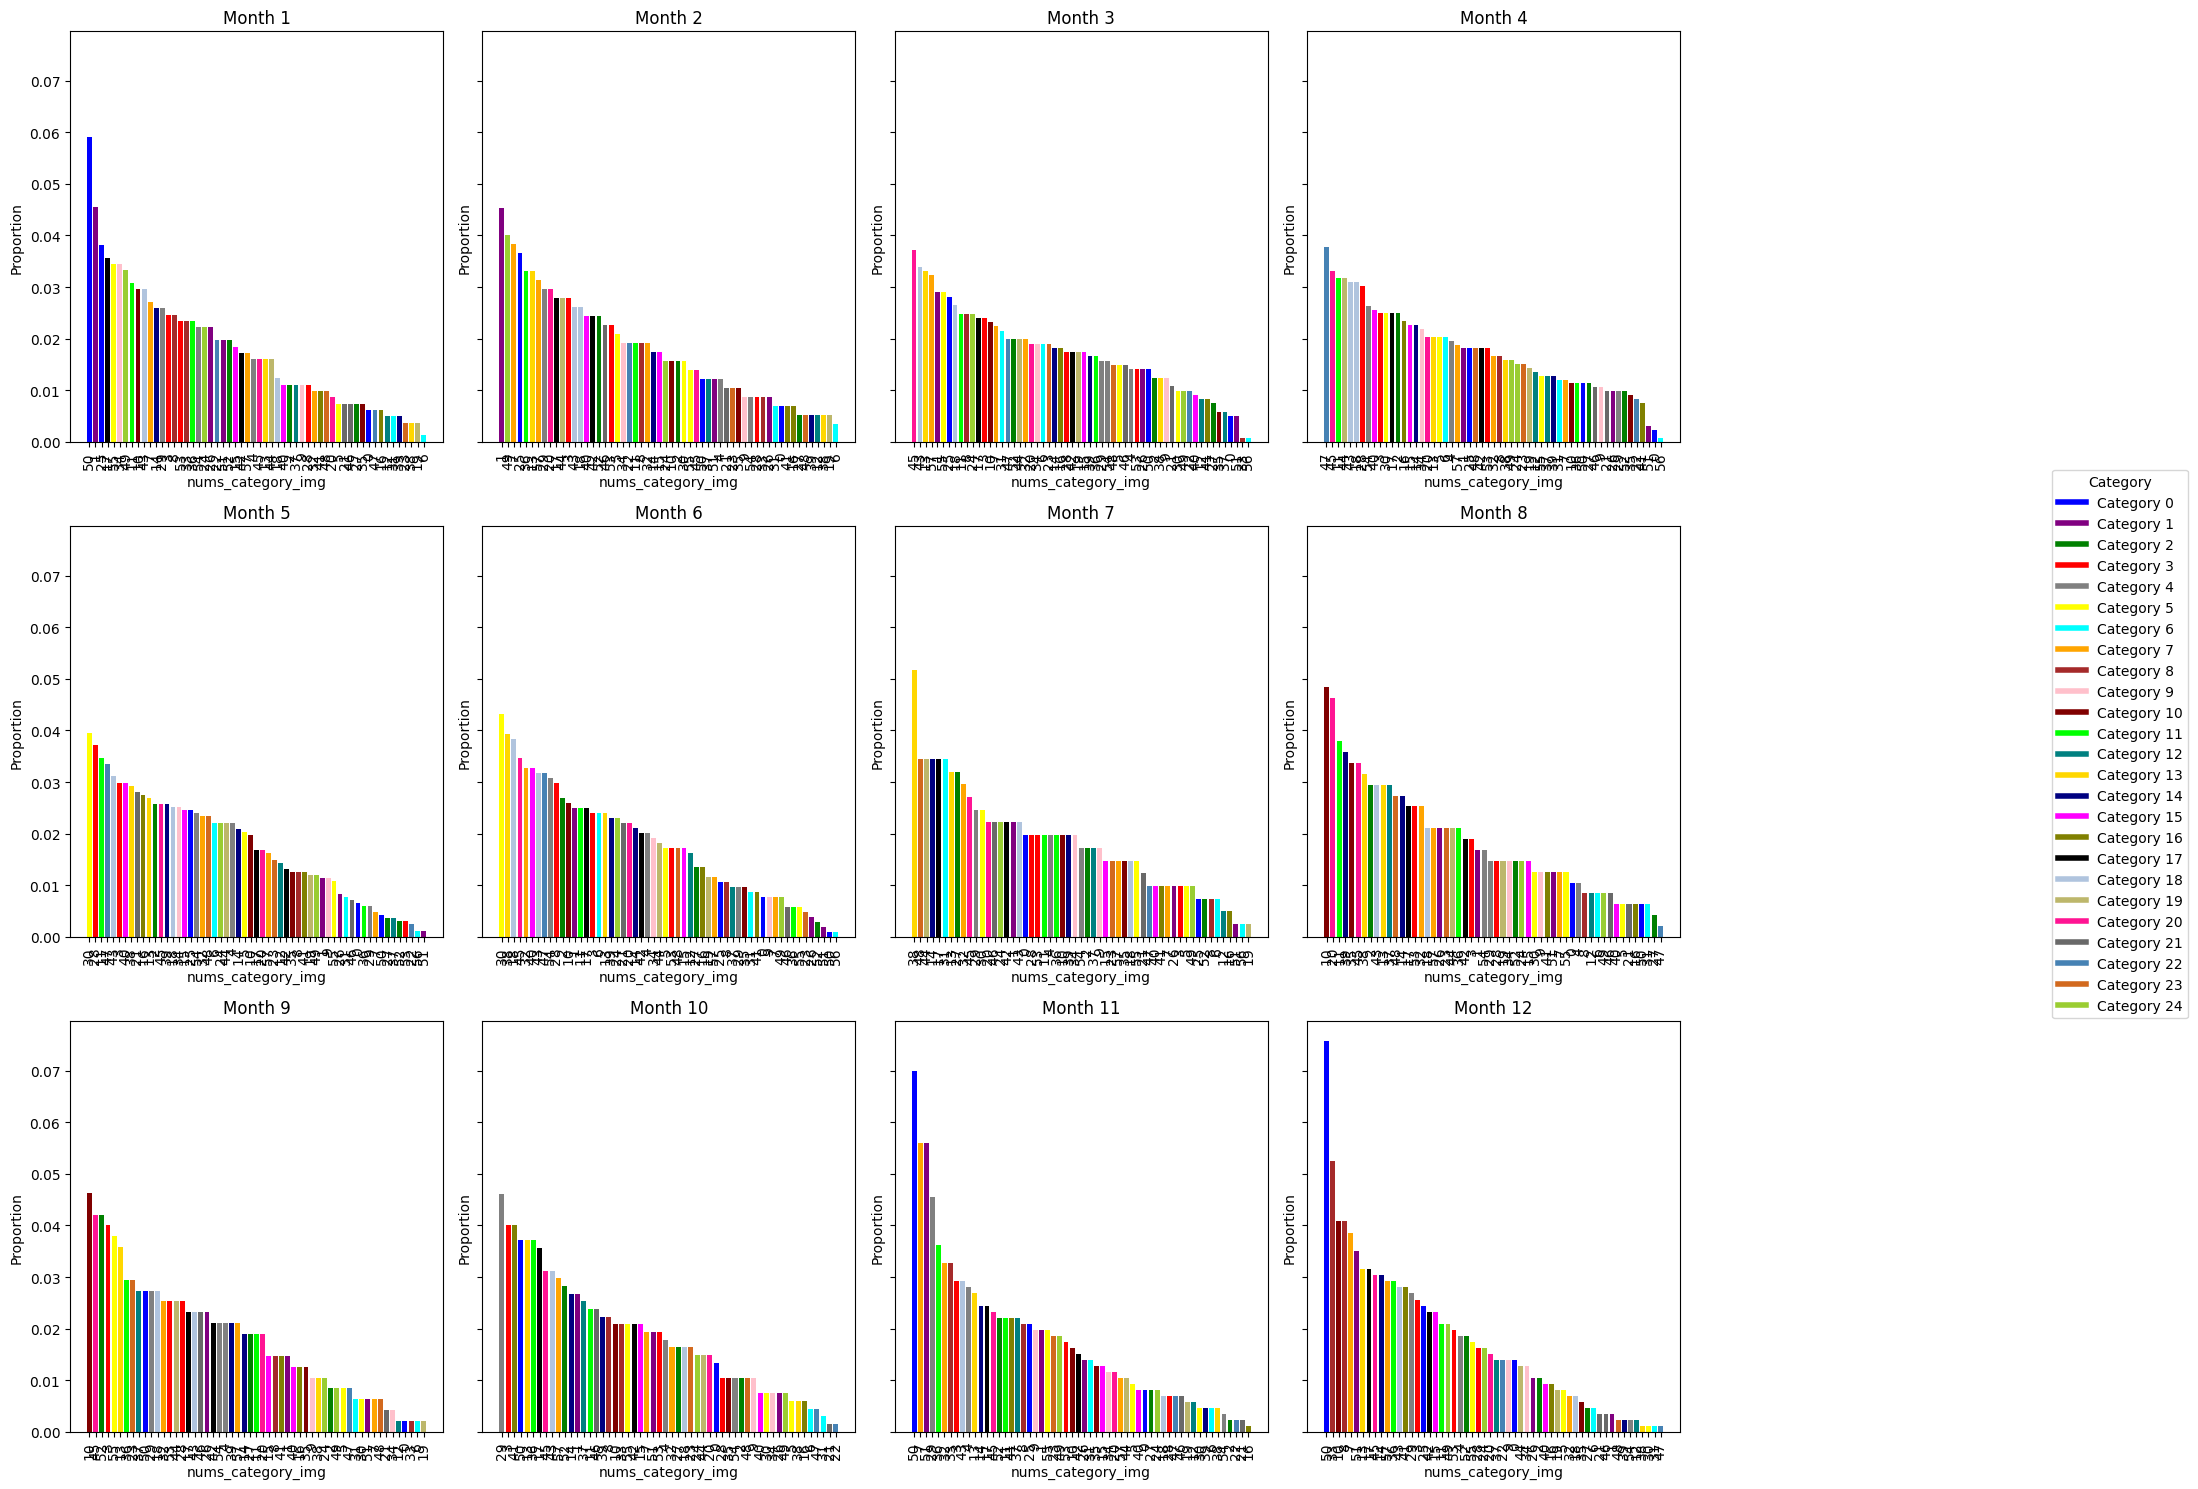

Top 5 categories for each month saved to 'top5_categories_per_month.json'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# 读取数据
file_path = '/data1/dxw_data/llm/redbook_final/script_next/combined_seg_img_pure_094_cluster_imagebind3/output.csv'
data = pd.read_csv(file_path)

# 预定义25种差别很大的颜色
colors = [
    '#0000FF', '#800080', '#008000', '#FF0000', '#808080', '#FFFF00',
    '#00FFFF', '#FFA500', '#A52A2A', '#FFC0CB', '#800000', '#00FF00',
    '#008080', '#FFD700', '#000080', '#FF00FF', '#808000', '#000000',
    '#B0C4DE', '#BDB76B', '#FF1493', '#696969', '#4682B4', '#D2691E',
    '#9ACD32'
]

# 创建一个字典来保存每个月的top5分类
top5_categories = {}

# 设置画布和子图
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
axes = axes.flatten()

# 绘制每个月的柱状图
for month in range(1, 13):
    ax = axes[month-1]
    monthly_data = data[data['month'] == month]
    sorted_data = monthly_data.sort_values(by='proportion', ascending=False)
    
    # 提取top5的分类
    top5 = sorted_data.head(5)
    top5_categories[month] = top5['nums_category_img'].tolist()
    
    bars = ax.bar(range(len(sorted_data)), sorted_data['proportion'], color=[colors[i % 25] for i in sorted_data['nums_category_img']])
    
    ax.set_title(f'Month {month}')
    ax.set_xticks(range(len(sorted_data)))
    ax.set_xticklabels(sorted_data['nums_category_img'], rotation=90)
    ax.set_xlabel('nums_category_img')
    ax.set_ylabel('Proportion')

# 添加图例
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(25)]
labels = [f'Category {i}' for i in range(25)]
fig.legend(handles, labels, loc='center right', title='Category', bbox_to_anchor=(1.1, 0.5))

# 调整布局
plt.tight_layout(rect=[0, 0, 0.85, 1])

# 保存图片
plt.savefig('monthly_category_proportions.png')
plt.show()

# 将top5分类保存为JSON格式
with open('top5_categories_per_month.json', 'w') as json_file:
    json.dump(top5_categories, json_file, indent=4)

print("Top 5 categories for each month saved to 'top5_categories_per_month.json'")


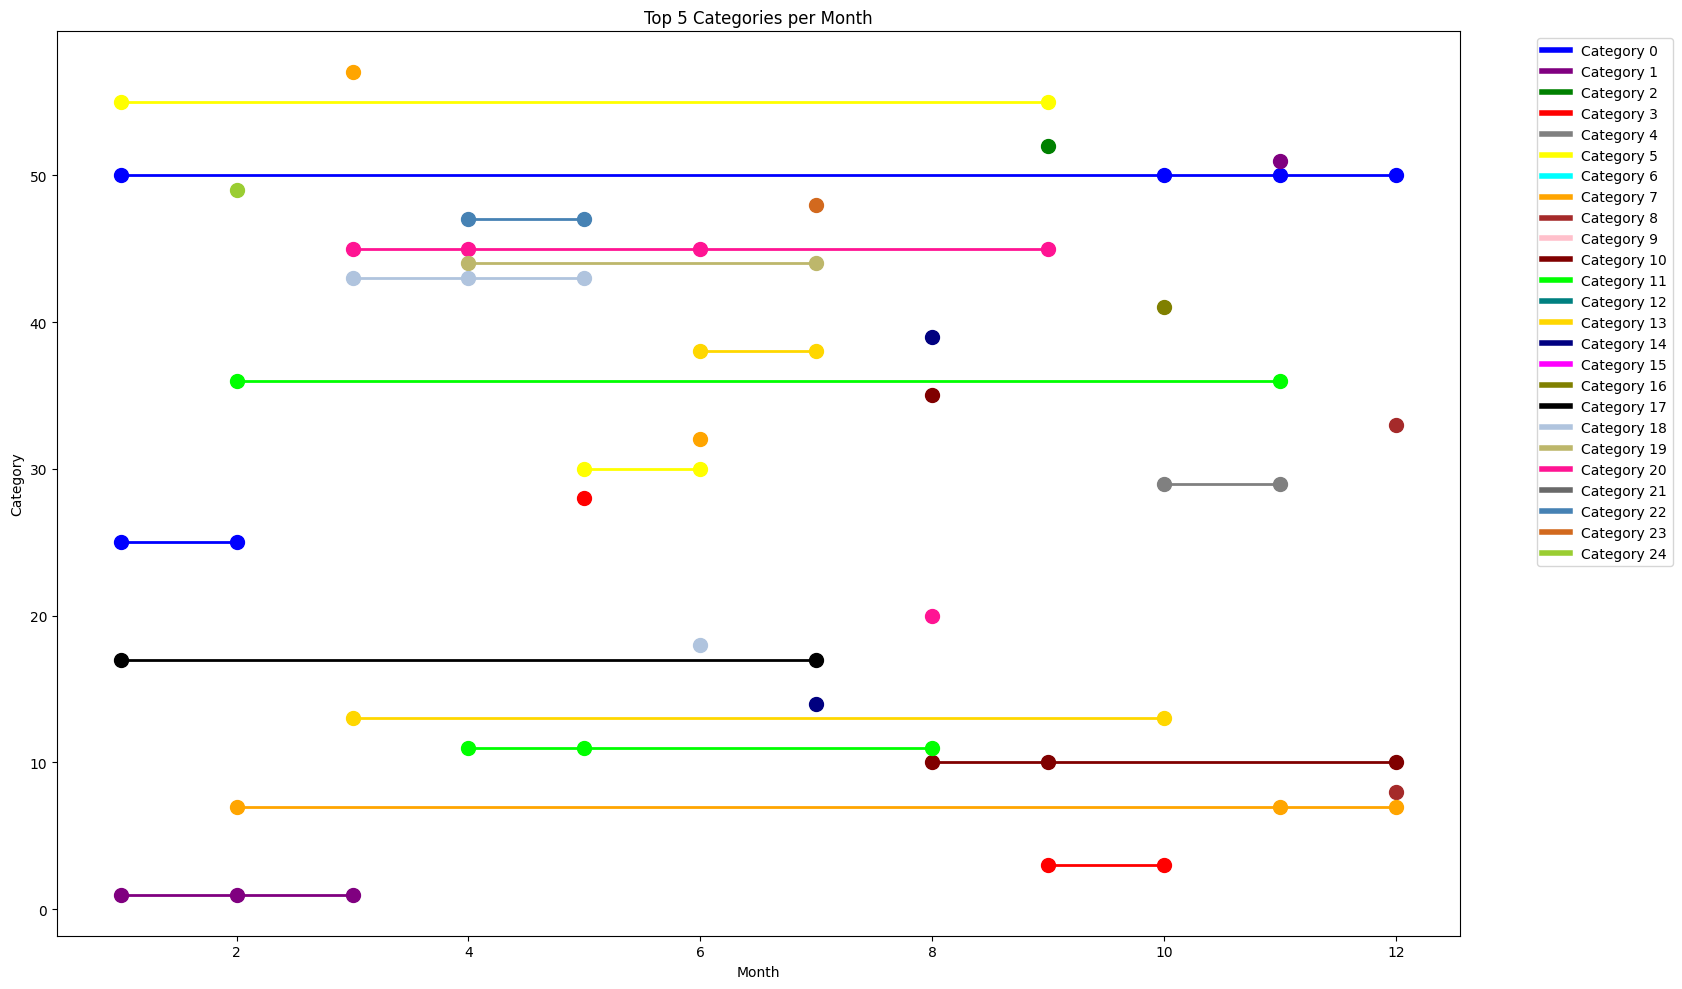

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# 读取JSON文件
json_file_path = '/data1/dxw_data/llm/Multimodal-MKT/model/top5_categories_per_month.json'
with open(json_file_path, 'r') as f:
    top5_categories_per_month = json.load(f)

# 预定义25种差别很大的颜色
colors = [
    '#0000FF', '#800080', '#008000', '#FF0000', '#808080', '#FFFF00',
    '#00FFFF', '#FFA500', '#A52A2A', '#FFC0CB', '#800000', '#00FF00',
    '#008080', '#FFD700', '#000080', '#FF00FF', '#808000', '#000000',
    '#B0C4DE', '#BDB76B', '#FF1493', '#696969', '#4682B4', '#D2691E',
    '#9ACD32'
]

# 创建图表
plt.figure(figsize=(20, 10))

# 为每个类别初始化一个空列表，存储每个月的比例
category_positions = {category: [] for category in range(100)}

# 绘制每个月的top5 category
for month in range(1, 13):
    top5_categories = top5_categories_per_month[str(month)]
    
    # 绘制每个top5类别的点
    for category in top5_categories:
        category_positions[category].append(month)
        # 绘制点
        plt.scatter(month, category, color=colors[category % 25], s=100, zorder=5)

# 绘制连线
for category, positions in category_positions.items():
    if len(positions) > 1:
        plt.plot(positions, [category] * len(positions), color=colors[category % 25], linestyle='-', linewidth=2, zorder=3)

# 设置图表标题和标签
plt.title('Top 5 Categories per Month')
plt.xlabel('Month')
plt.ylabel('Category')

# 设置图例
handles = [plt.Line2D([0], [0], color=colors[i % 25], lw=4) for i in range(25)]
labels = [f'Category {i}' for i in range(25)]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局并保存图片
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('top5_categories_line_plot.png')
plt.show()


In [5]:
import os
import json
import random
from PIL import Image

# Constants
input_base_path = '/data1/dxw_data/llm/redbook_final/script_next/combined_seg_img_pure_094_cluster_imagebind3'
replacement_base_path = '/data1/dxw_data/llm/redbook_final/data2/all_processed_data'
output_base_path = '/data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12'
json_file_path = '/data1/dxw_data/llm/Multimodal-MKT/model/top5_categories_per_month.json'

# Ensure the output directory exists
os.makedirs(output_base_path, exist_ok=True)

# Load the top 5 categories per month from the JSON file
with open(json_file_path, 'r') as f:
    top5_categories_per_month = json.load(f)

# Function to sample images from a category folder
def sample_images_from_category(category, sample_size=10):
    category_path = os.path.join(input_base_path, str(category))
    image_files = [f for f in os.listdir(category_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    sampled_files = random.sample(image_files, min(sample_size, len(image_files)))
    return sampled_files

# Function to replace sampled images with corresponding images from another directory
def replace_with_processed_images(sampled_files):
    replaced_images = []
    for file in sampled_files:
        replacement_image_path = os.path.join(replacement_base_path, file)
        if os.path.exists(replacement_image_path):
            replaced_images.append(replacement_image_path)
        else:
            print(f"Replacement image not found for {file}")
    return replaced_images

# Function to create a composite image for a given month's top categories
def create_monthly_composite_image(month, top_categories):
    images_per_row = 10
    image_width, image_height = 100, 100  # Image size for each thumbnail
    rows = len(top_categories)
    
    # Create a new blank image for the composite
    composite_image = Image.new('RGB', (image_width * images_per_row, image_height * rows), color=(255, 255, 255))

    for row_index, category in enumerate(top_categories):
        sampled_images = sample_images_from_category(category, sample_size=images_per_row)
        processed_images = replace_with_processed_images(sampled_images)
        
        for col_index, image_path in enumerate(processed_images):
            try:
                with Image.open(image_path) as img:
                    # Resize and paste the image into the composite image
                    img = img.resize((image_width, image_height))
                    composite_image.paste(img, (col_index * image_width, row_index * image_height))
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    # Save the composite image
    output_file_path = os.path.join(output_base_path, f'month_{month}_top5.png')
    composite_image.save(output_file_path)
    print(f"Saved composite image for month {month} to {output_file_path}")

# Create and save composite images for each month
for month_str, top_categories in top5_categories_per_month.items():
    month = int(month_str)
    create_monthly_composite_image(month, top_categories)


Saved composite image for month 1 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_1_top5.png
Saved composite image for month 2 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_2_top5.png
Saved composite image for month 3 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_3_top5.png
Saved composite image for month 4 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_4_top5.png
Saved composite image for month 5 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_5_top5.png
Saved composite image for month 6 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_6_top5.png
Saved composite image for month 7 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_7_top5.png
Saved composite image for month 8 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/image/top12/month_8_top5.png
Saved composite image for month 9 to /data1/dxw_data/llm/Multimodal-MKT/model/visual/ima